# Spark Foundation_Task_2

### Name: Maddu Vijay Kumar

#### From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually

## Step-1:

## Importing all required libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans


## Step-2:

### Loading iris dataset

In [20]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step-3:

## finding optimum number of clusters using elbow method

In [22]:
x=df.iloc[:,[0,1,2,3]].values

#within-cluster sum of squares
wcss=[]

#lets consider 1 to 10 clusters

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\vijay kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Visualizing the results on a line graph and observe the elbow


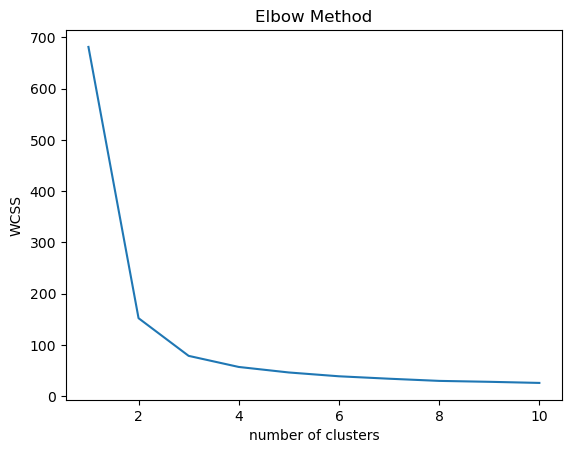

In [24]:
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

### here we are observing the elbow at x=3 , where the within cluster sum of squares doesn't decereae significantly from this point

##### So consider optimum number of clusters as n=3

## Step-4:

### Applying Kmeans to the dataset by creating kmeans classifier

In [27]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y=kmeans.fit_predict(x)

## Step-5

### Visualize the clusters and centroids for clusters

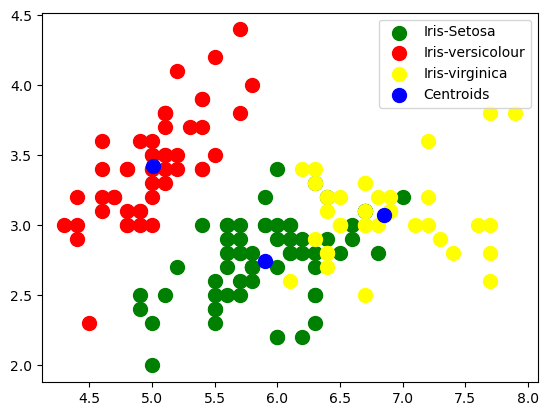

In [32]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,c="green",label="Iris-Setosa")

plt.scatter(x[y==1,0],x[y==1,1],s=100,c="red",label="Iris-versicolour")

plt.scatter(x[y==2,0],x[y==2,1],s=100,c="yellow",label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="blue",s=100,label="Centroids")
plt.legend()
plt.show()